## Steps

Here let's work on regression. 
1. Find a data set and build a KNN Regression and an OLS regression. 
2. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. 
3. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other.
4. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. 
5. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 
6. Submit a link to your notebook below.

**Step 1. Find a data set and build a KNN Regression and an OLS regression.**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine


import warnings
warnings.filterwarnings(action='ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged', con=engine)
engine.dispose()

weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [38]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [39]:
weather_df.isnull().sum()

date                   0
summary                0
preciptype             0
temperature            0
apparenttemperature    0
humidity               0
windspeed              0
windbearing            0
visibility             0
loudcover              0
pressure               0
dailysummary           0
dtype: int64

In [40]:
weather_df.preciptype[weather_df.preciptype=='rain'].count()

85224

In [42]:
preciptype = pd.get_dummies(weather_df.preciptype, dtype='float')
preciptype

,null,rain,snow
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [43]:
weather_df = pd.concat([weather_df, preciptype], axis=1)

In [44]:
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary,null,rain,snow
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.0,1.0,0.0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.0,1.0,0.0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.0,1.0,0.0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.0,1.0,0.0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.0,1.0,0.0


In [45]:
weather_df.drop(['summary', 'preciptype', 'dailysummary'], axis=1, inplace=True)

In [46]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
null                   96453 non-null float64
rain                   96453 non-null float64
snow                   96453 non-null float64
dtypes: datetime64[ns, UTC](1), float64(11)
memory usage: 8.8 MB


In [47]:
month = pd.DatetimeIndex(weather_df.date)

In [48]:
month = month.month

In [49]:
weather_df['month'] = pd.DataFrame(month)

In [50]:
weather_df

,date,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,null,rain,snow,month
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0.0,1.0,0.0,3
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0.0,1.0,0.0,3
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0.0,1.0,0.0,4
3,2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0.0,1.0,0.0,4
4,2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0.0,1.0,0.0,4
5,2006-04-01 03:00:00+00:00,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,0.0,1.0,0.0,4
6,2006-04-01 04:00:00+00:00,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,0.0,1.0,0.0,4
7,2006-04-01 05:00:00+00:00,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,0.0,1.0,0.0,4
8,2006-04-01 06:00:00+00:00,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,0.0,1.0,0.0,4
9,2006-04-01 07:00:00+00:00,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,0.0,1.0,0.0,4


In [51]:
weather_df.drop('date', axis=1, inplace=True)

In [52]:
weather_df

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,null,rain,snow,month
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0.0,1.0,0.0,3
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0.0,1.0,0.0,3
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0.0,1.0,0.0,4
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0.0,1.0,0.0,4
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0.0,1.0,0.0,4
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,0.0,1.0,0.0,4
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,0.0,1.0,0.0,4
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,0.0,1.0,0.0,4
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,0.0,1.0,0.0,4
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,0.0,1.0,0.0,4


In [53]:
weather_df['temp_gap'] = weather_df['temperature'] - weather_df['apparenttemperature']

In [54]:
weather_df.drop(['null', 'snow'], axis=1, inplace=True)

In [55]:
weather_df.drop('loudcover', axis=1, inplace=True)

In [56]:
weather_df

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,pressure,rain,month,temp_gap
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1.0,3,2.083333
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1.0,3,2.127778
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1.0,4,0.000000
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1.0,4,2.344444
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1.0,4,1.777778
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,1.0,4,2.111111
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,1.0,4,2.211111
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,1.0,4,2.244444
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,1.0,4,0.000000
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,1.0,4,0.000000


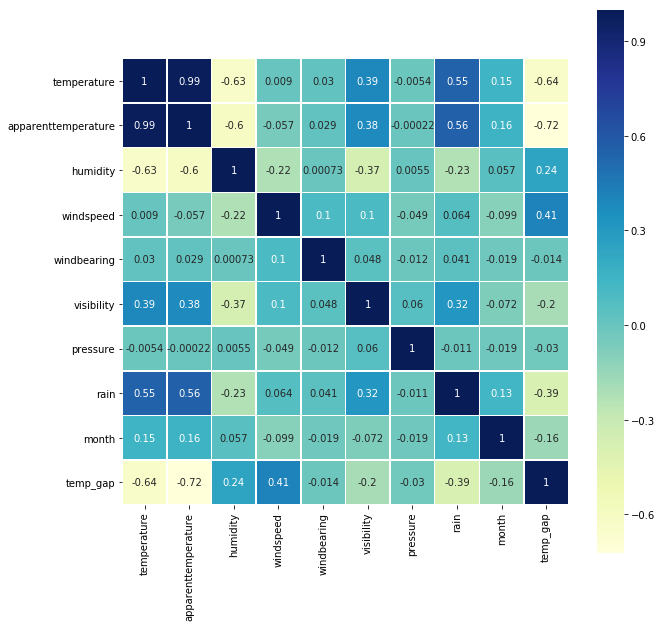

In [57]:
import scipy.stats as stats
import seaborn as sns

weather_corr = weather_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(weather_corr, linewidths=0.5, annot=True, square=True, cmap='YlGnBu')

In [58]:
rain_df = weather_df[['rain', 'humidity', 'visibility', 'month', 'temp_gap']]

In [59]:
rain_df

,rain,humidity,visibility,month,temp_gap
0,1.0,0.89,15.8263,3,2.083333
1,1.0,0.86,15.8263,3,2.127778
2,1.0,0.89,14.9569,4,0.000000
3,1.0,0.83,15.8263,4,2.344444
4,1.0,0.83,15.8263,4,1.777778
5,1.0,0.85,14.9569,4,2.111111
6,1.0,0.95,9.9820,4,2.211111
7,1.0,0.89,9.9820,4,2.244444
8,1.0,0.82,9.9820,4,0.000000
9,1.0,0.72,9.9820,4,0.000000


In [60]:
Y = rain_df['rain']
X = rain_df[['humidity', 'visibility', 'month', 'temp_gap']]

In [61]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [62]:
X

array([[ 0.79347043,  1.30697578, -1.02160898,  0.59908998],
       [ 0.63999555,  1.30697578, -1.02160898,  0.62556571],
       [ 0.79347043,  1.09958576, -0.73162637, -0.6419603 ],
       ...,
       [-0.89475327,  1.37226523,  0.71828668, -0.6419603 ],
       [-0.6901201 ,  1.37226523,  0.71828668, -0.6419603 ],
       [-0.6389618 ,  1.23400522,  0.71828668, -0.6419603 ]])

Now, split your data into train and test sets where 20% of the data resides in the test set

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

The number of observations in the training set is 77162
The number of observations in the test set is 19291


1. Let's start with OLS regression.

In [64]:
from sklearn import linear_model
lrm = linear_model.LinearRegression()
lrm.fit(X_train, y_train)

lrm_y_train = lrm.predict(X_train)
lrm_y_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)), '\n')
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, lrm_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, lrm_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, lrm_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - lrm_y_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.22433469403230422 

-----Test set statistics-----
R-squared of the model in the test set is: 0.23650212438140827
Mean absolute error of the prediction is: 0.18261642096697617
Mean squared error of the prediction is: 0.08029666584752333
Root mean squared error of the prediction is: 0.28336666326073595
Mean absolute percentage error of the prediction is: inf


2. This time, I will do Ridge Regression with built in cross-validation method.

In [65]:
alphas = [np.power(10.0, p) for p in np.arange(-10, 40, 1)]

rgm_cv = linear_model.RidgeCV(alphas=alphas, cv=5)
rgm_cv.fit(X_train, y_train)

rgm_y_train = rgm_cv.predict(X_train)
rgm_y_test = rgm_cv.predict(X_test)

print("Best alpha value is: {}".format(rgm_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(rgm_cv.score(X_train, y_train)), '\n')
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rgm_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, rgm_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, rgm_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, rgm_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - rgm_y_test) / y_test)) * 100))

Best alpha value is: 100.0
R-squared of the model in the training set is: 0.224334465252794 

-----Test set statistics-----
R-squared of the model in the test set is: 0.23648399953845944
Mean absolute error of the prediction is: 0.18258693460083952
Mean squared error of the prediction is: 0.08029857202762453
Root mean squared error of the prediction is: 0.28337002669235245
Mean absolute percentage error of the prediction is: inf


3. This time, I will do Lasso Regression with built in cross-validation method.

In [66]:
lass_cv = linear_model.LassoCV(alphas=alphas, cv=5)
lass_cv.fit(X_train, y_train)

lass_y_train = lass_cv.predict(X_train)
lass_y_test = lass_cv.predict(X_test)

print("Best alpha value is: {}".format(lass_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(lass_cv.score(X_train, y_train)), '\n')
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lass_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, lass_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, lass_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, lass_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - lass_y_test) / y_test)) * 100))

Best alpha value is: 1e-10
R-squared of the model in the training set is: 0.22433469403230433 

-----Test set statistics-----
R-squared of the model in the test set is: 0.23650212436333917
Mean absolute error of the prediction is: 0.18261642094989008
Mean squared error of the prediction is: 0.08029666584942366
Root mean squared error of the prediction is: 0.2833666632640891
Mean absolute percentage error of the prediction is: inf


4. This time, I will do ElasticNet Regression with built in cross-validation method.

In [67]:
elanet_cv = linear_model.ElasticNetCV(alphas=alphas, cv=5)
elanet_cv.fit(X_train, y_train)

elanet_y_train = elanet_cv.predict(X_train)
elanet_y_test = elanet_cv.predict(X_test)

print("Best alpha value is: {}".format(elanet_cv.alpha_))
print("R-squared of the model in the training set is: {}".format(elanet_cv.score(X_train, y_train)), '\n')
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(elanet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, elanet_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, elanet_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, elanet_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - elanet_y_test) / y_test)) * 100))

Best alpha value is: 1e-10
R-squared of the model in the training set is: 0.22433469403230422 

-----Test set statistics-----
R-squared of the model in the test set is: 0.23650212437393825
Mean absolute error of the prediction is: 0.18261642095490552
Mean squared error of the prediction is: 0.08029666584830895
Root mean squared error of the prediction is: 0.2833666632621222
Mean absolute percentage error of the prediction is: inf


5. This time, let's do KNN regression

In [68]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')

knn.fit(X_train, y_train)
knn_w.fit(X_train, y_train)

knn_y_train = knn.predict(X_train)
knn_y_test = knn.predict(X_test)

knn_w_y_train = knn_w.predict(X_train)
knn_w_y_test = knn_w.predict(X_test)


print("R-squared of the model in the training set is: {}".format(knn.score(X_train, y_train)), '\n')
print("-----Test set statistics for non-weighted model-----")
print("R-squared of the model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, knn_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, knn_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, knn_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - knn_y_test) / y_test)) * 100), '\n')


print("-----Test set statistics for weighted model-----")
print("R-squared of the model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, knn_w_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, knn_w_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, knn_w_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - knn_w_y_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.426537343997927 

-----Test set statistics for non-weighted model-----
R-squared of the model in the test set is: 0.4325890880659148
Mean absolute error of the prediction is: 0.12191280908195533
Mean squared error of the prediction is: 0.05967430407962262
Root mean squared error of the prediction is: 0.24428324559744702
Mean absolute percentage error of the prediction is: inf 

-----Test set statistics for weighted model-----
R-squared of the model in the test set is: 0.4325890880659148
Mean absolute error of the prediction is: 0.11390703876653514
Mean squared error of the prediction is: 0.05942017851011359
Root mean squared error of the prediction is: 0.24376254533892935
Mean absolute percentage error of the prediction is: inf


**Step 2. Compare the two. How similar are they? Do they miss in different ways?**

When I compare OLS and KNN, the KNN shows better performance than OLS.  
R-square of OLS is about 0.237, but KNN's score is about 0.424 (k=150). However, when I increase the K value, it decreased by 0.369 (k=1000).

**Step 3,4,5,6.**
3. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other.
4. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other.
5. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.
6. Submit a link to your notebook below.

I made several linear regression models to check my OLS model has good performance or works well.  
The result of OLS, Ridge and ElasticNet tell they are quite similar. However, KNN model is different with them.  
Because as we know if I increase the k number of it, then its performace has been decreased. It is 0.424 when the k value is 150. It means that a new data will be considered with the nearest 150 data and gives output. For this reason, when the k value is increased, the R-square value should be decreased. As I did, I found out that KNN's performance would be decreased from 0.424 to 0.369. It is a quite big differece! Also, when I did the k=1000 case, the calculating speed was too slow. It almost took 5 mininutes with my labtop.
Moreover, I tried to increase the k value up to maximum, but my computer couldn't calculate it and shutdowned itself.  


For these reasons, I prefer to use OLS model to KNN due to the calculating speed and precision.